In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


In [4]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.to_json('/content/sample_data/california_housing_test.json', orient='records', lines=True)

Missing Values Count:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


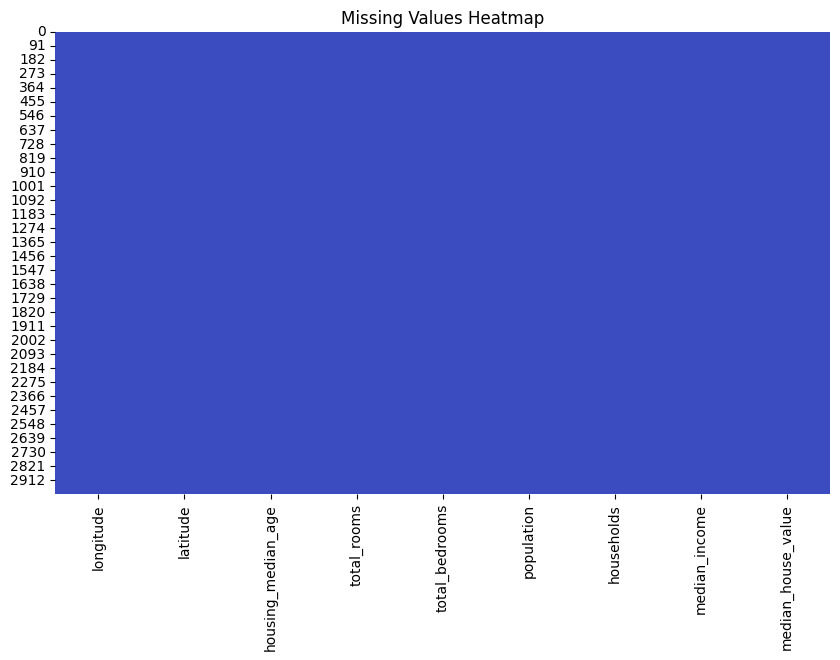


Percentage of Missing Values:
longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Count:")
print(missing_values)

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Calculate percentage of missing values
missing_percent = df.isnull().mean() * 100
print("\nPercentage of Missing Values:")
print(missing_percent)

# Handle missing values (example: drop rows with missing values)
df.dropna(how='any', inplace=True)

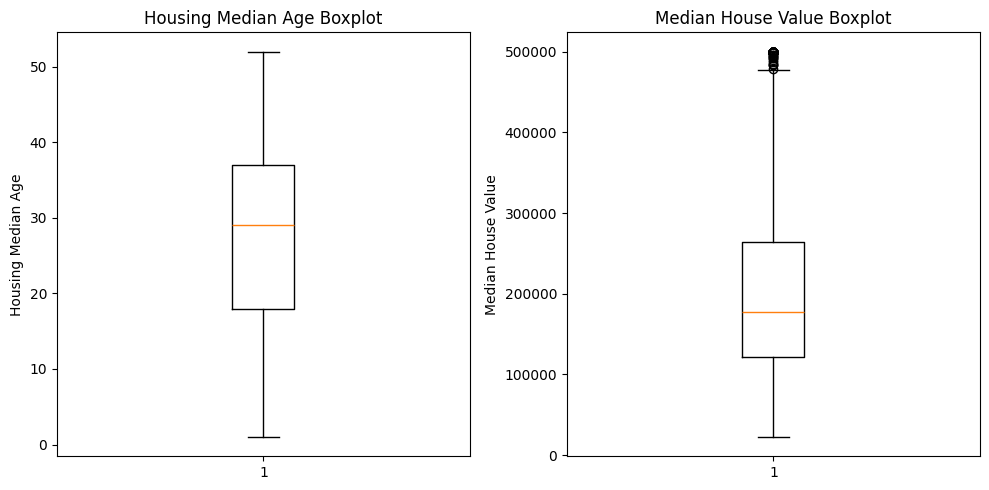

In [6]:
import matplotlib.pyplot as plt

# Create a boxplot for both size and price columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['housing_median_age']) # Changed california_housing_test to df and 'size' to 'housing_median_age'
plt.title('Housing Median Age Boxplot') # Changed title to reflect the column being plotted
plt.ylabel('Housing Median Age') # Changed y-axis label to reflect the column being plotted

plt.subplot(1, 2, 2)
plt.boxplot(df['median_house_value']) # Changed california_housing_test to df and 'price' to 'median_house_value'
plt.title('Median House Value Boxplot') # Changed title to reflect the column being plotted
plt.ylabel('Median House Value') # Changed y-axis label to reflect the column being plotted


plt.tight_layout()
plt.show()

In [7]:
import numpy as np

# Replace 'house_data' with 'df' throughout the code
# For size column, assuming 'size' corresponds to 'total_rooms'
Q1 = np.percentile(df['total_rooms'], 25)
Q3 = np.percentile(df['total_rooms'], 75)
IQR = Q3 - Q1
lower_bound_size = Q1 - 1.5 * IQR
upper_bound_size = Q3 + 1.5 * IQR

# For price column, assuming 'price' corresponds to 'median_house_value'
Q1_price = np.percentile(df['median_house_value'], 25)
Q3_price = np.percentile(df['median_house_value'], 75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

print("Outlier bounds for Size:")
print(f"Lower bound: {lower_bound_size}, Upper bound: {upper_bound_size}")
print("Outlier bounds for Price:")
print(f"Lower bound: {lower_bound_price}, Upper bound: {upper_bound_price}")

# Identify rows with outliers
outliers_size = df[(df['total_rooms'] < lower_bound_size) | (df['total_rooms'] > upper_bound_size)]
outliers_price = df[(df['median_house_value'] < lower_bound_price) | (df['median_house_value'] > upper_bound_price)]

print("\nOutliers in Size:")
print(outliers_size)
print("\nOutliers in Price:")
print(outliers_price)

Outlier bounds for Size:
Lower bound: -1191.0, Upper bound: 5721.0
Outlier bounds for Price:
Lower bound: -92962.5, Upper bound: 478137.5

Outliers in Size:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19      -122.59     38.01                35.0       8814.0          1307.0   
24      -117.28     33.28                13.0       6131.0          1040.0   
33      -118.08     34.55                 5.0      16181.0          2971.0   
39      -119.01     34.23                11.0       5785.0          1035.0   
45      -117.24     33.17                 4.0       9998.0          1874.0   
...         ...       ...                 ...          ...             ...   
2919    -121.39     38.60                22.0       5773.0          1320.0   
2936    -119.75     36.87                 3.0      13802.0          2244.0   
2968    -119.23     34.17                18.0       6171.0          1490.0   
2969    -118.11     34.68                 6.0       7430.0     

Correlation between total_rooms and median_house_value: 0.16042702728397568


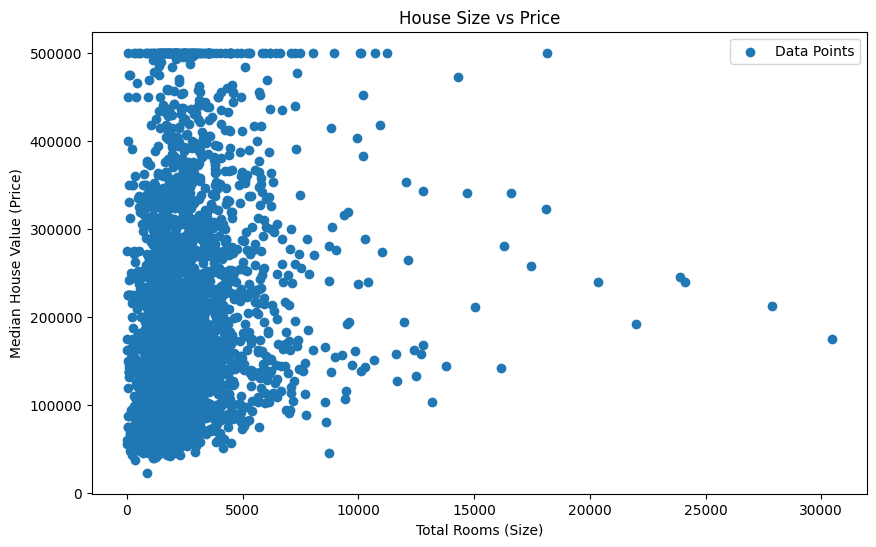

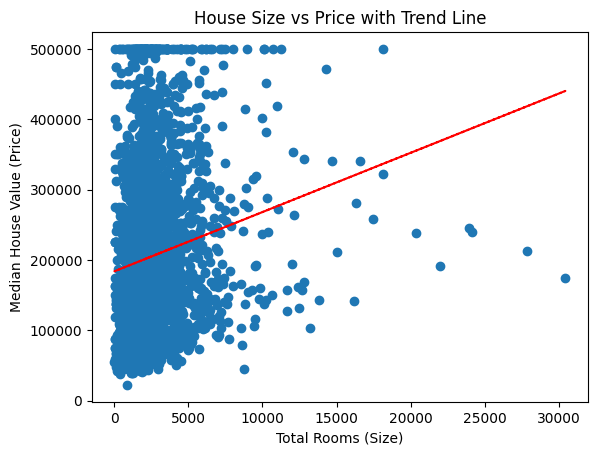

In [8]:
# Calculate correlation coefficient
# Assuming 'total_rooms' represents 'size' and 'median_house_value' represents 'price'
correlation = df['total_rooms'].corr(df['median_house_value'])
print(f"Correlation between total_rooms and median_house_value: {correlation}")

# Create a scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['total_rooms'], df['median_house_value'], label='Data Points')
plt.title('House Size vs Price')
plt.xlabel('Total Rooms (Size)')
plt.ylabel('Median House Value (Price)')
plt.legend()
plt.show()

# Add a trend line
z = np.polyfit(df['total_rooms'], df['median_house_value'], 1)
p = np.poly1d(z)
plt.scatter(df['total_rooms'], df['median_house_value'])
plt.plot(df['total_rooms'], p(df['total_rooms']), "r--")
plt.title('House Size vs Price with Trend Line')
plt.xlabel('Total Rooms (Size)')
plt.ylabel('Median House Value (Price)')
plt.show()

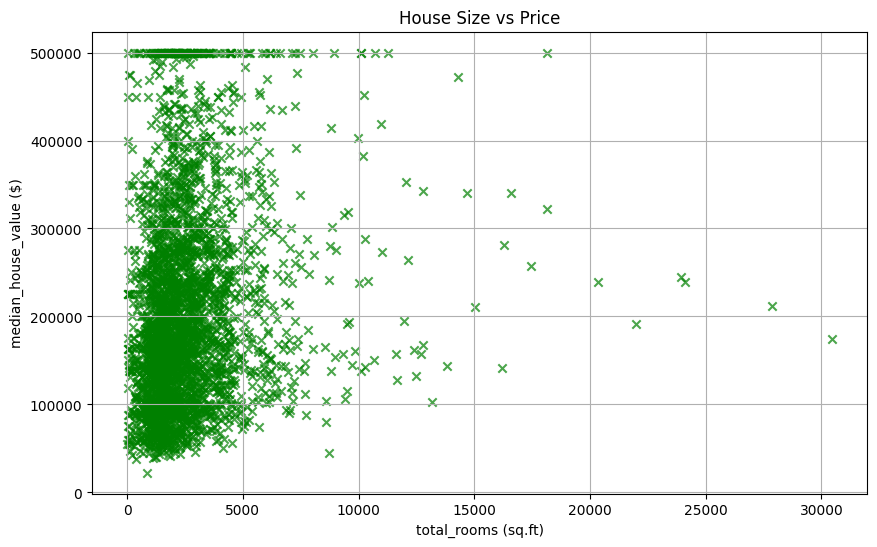

In [9]:
import matplotlib.pyplot as plt

# Create a scatter plot of house size vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['total_rooms'], df['median_house_value'], color='green', marker='x', alpha=0.7)
plt.xlabel('total_rooms (sq.ft)')
plt.ylabel('median_house_value ($)')
plt.title('House Size vs Price')
plt.grid(True)
plt.show()

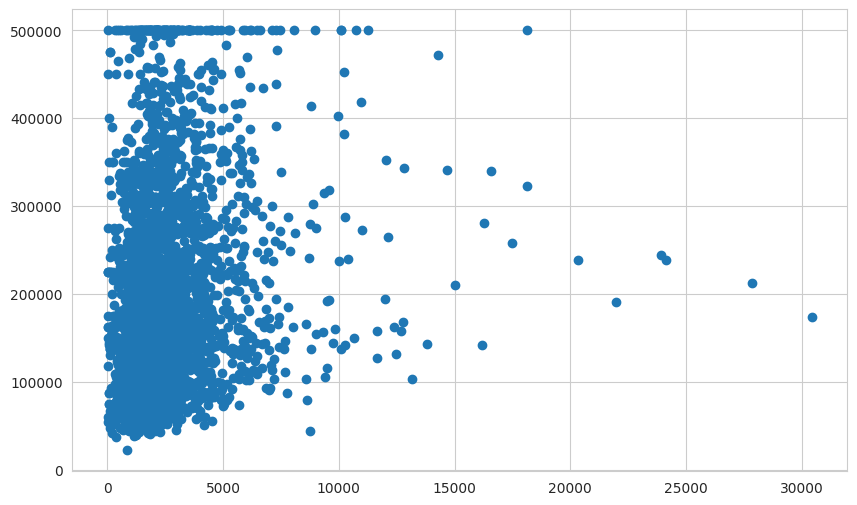

In [10]:
df['total_rooms'] = pd.to_numeric(df['total_rooms'], errors='coerce')
df['median_house_value'] = pd.to_numeric(df['median_house_value'], errors='coerce')
df.dropna(inplace=True)
# Set the style for plots
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(df['total_rooms'], df['median_house_value'])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df[['total_rooms']])

In [12]:
# Split the dataset into features (X) and target (y)
X = df.drop('median_house_value', axis=1)  # Assuming 'median_house_value' is your target variable
y = df['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
# Slope coefficient
slope = model.coef_
# Intercept coefficient
intercept = model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

Slope (Coefficient): [-4.40099473e+04 -4.33583030e+04  1.14711666e+03 -7.88631396e+00
  9.85275637e+01 -4.05048347e+01  6.14349440e+01  3.95481370e+04]
Intercept: -3700204.0909373183


In [14]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

# Predict target values for training and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE for training set
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Training MSE: {mse_train}")

# Calculate MSE for test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE: {mse_test}")

Training MSE: 4929634100.81988
Test MSE: 4586505886.68125


In [15]:
# Calculate R² for training set
r2_train = r2_score(y_train, y_pred_train)  # Use y_pred_train instead of y_train_pred
print(f"R² score for training set: {r2_train}")

# Calculate R² for test set
r2_test = r2_score(y_test, y_pred_test)  # Use y_pred_test instead of y_test_pred
print(f"R² score for test set: {r2_test}")

R² score for training set: 0.6157997463644627
R² score for test set: 0.6358044169850408


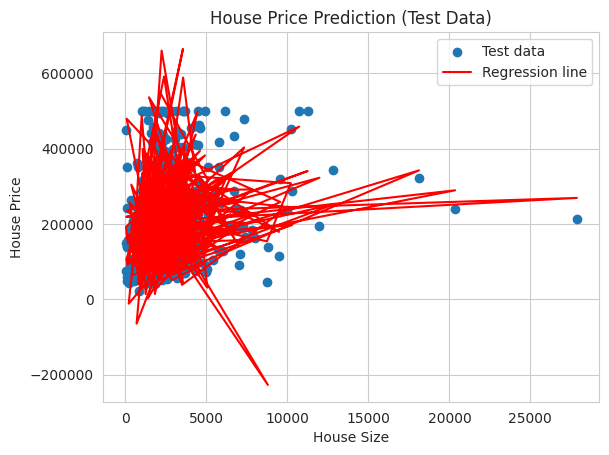

In [16]:
plt.scatter(X_test['total_rooms'], y_test, label='Test data')  # Replace 'x_test' with 'X_test['total_rooms']' assuming 'total_rooms' represents house size
plt.plot(X_test['total_rooms'], y_pred_test, color='red', label='Regression line') # Replace 'x_test' with 'X_test['total_rooms']' and 'y_test_pred' with 'y_pred_test'
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.title('House Price Prediction (Test Data)')
plt.legend()
plt.show()

Training MSE:  4929634100.81988
Test MSE:  4586505886.68125
Training R²:  0.6157997463644627
Test R²:  0.6358044169850408
Model Performance:
Training MSE: 4929634100.82, Test MSE: 4586505886.68
Training R²: 0.62, Test R²: 0.64


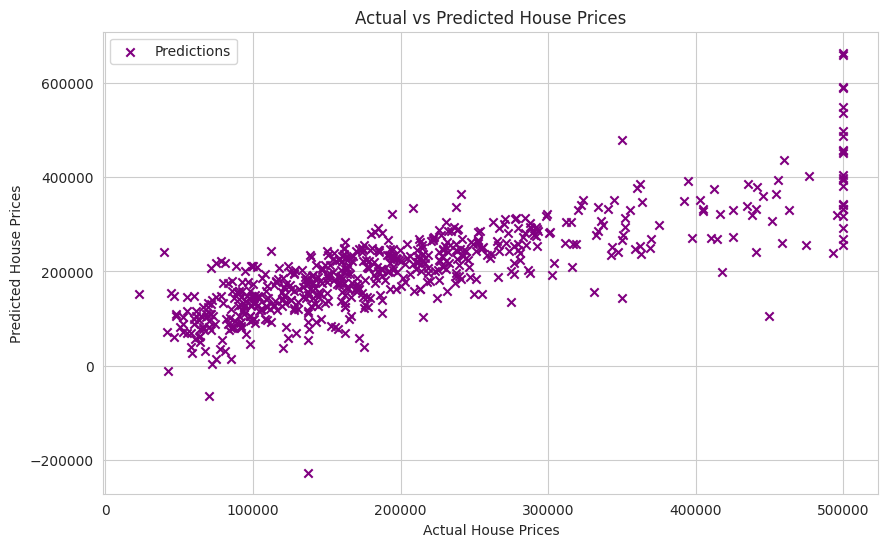

In [19]:
# Print comparison of MSE and R²
print("Training MSE: ", mse_train)
print("Test MSE: ", mse_test)
print("Training R²: ", r2_train)
print("Test R²: ", r2_test)

# Calculate and print metrics using scikit-learn
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Example output:
print("Model Performance:")
print(f"Training MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
print(f"Training R²: {r2_train:.2f}, Test R²: {r2_test:.2f}")

y_pred = model.predict(X_test)

# Visualize predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple',marker = 'x', label='Predictions')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso # Import Ridge and Lasso

# For Ridge Regression
ridge_params = {'alpha': [0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
print("Best Parameters for Ridge: ", ridge_grid.best_params_)
print("Best Score for Ridge: ", ridge_grid.best_score_)

# For Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
print("Best Parameters for Lasso: ", lasso_grid.best_params_)
print("Best Score for Lasso: ", lasso_grid.best_score_)

Best Parameters for Ridge:  {'alpha': 1}
Best Score for Ridge:  0.6083267062042602
Best Parameters for Lasso:  {'alpha': 1}
Best Score for Lasso:  0.6083238533821763


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X is your feature matrix and y is your target variable

# Create polynomial features (degree=2 for quadratic)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Scale the polynomial features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Train the model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_scaled, y)

# Make predictions
y_pred_poly = poly_model.predict(X_poly_scaled)

# Evaluate the model
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly}, R²: {r2_poly}")

Polynomial Regression MSE: 3919263829.0883837, R²: 0.6936111932564211


In [25]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}, R²: {r2_dt}")

Decision Tree MSE: 6417804419.376667, R²: 0.49038852670433597


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R²: {r2_rf}")

Random Forest MSE: 3315046418.020424, R²: 0.7367657879959226


In [31]:
# Assuming you have already trained multiple models
# Calculate performance metrics for each model
# ... (Your previous code) ...

# Make predictions for Linear Regression
y_train_lr_pred = model.predict(X_train)  # Assuming 'model' is your Linear Regression model
y_test_lr_pred = model.predict(X_test)

# Make predictions for Ridge Regression
y_train_ridge_pred = ridge_grid.predict(X_train)  # Assuming 'ridge_grid' is your trained Ridge model
y_test_ridge_pred = ridge_grid.predict(X_test)

# Make predictions for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)  # Assuming degree=2 as in your previous code
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly_scaled, y_train)
y_train_poly_pred = poly_model.predict(X_train_poly_scaled)
y_test_poly_pred = poly_model.predict(X_test_poly_scaled)

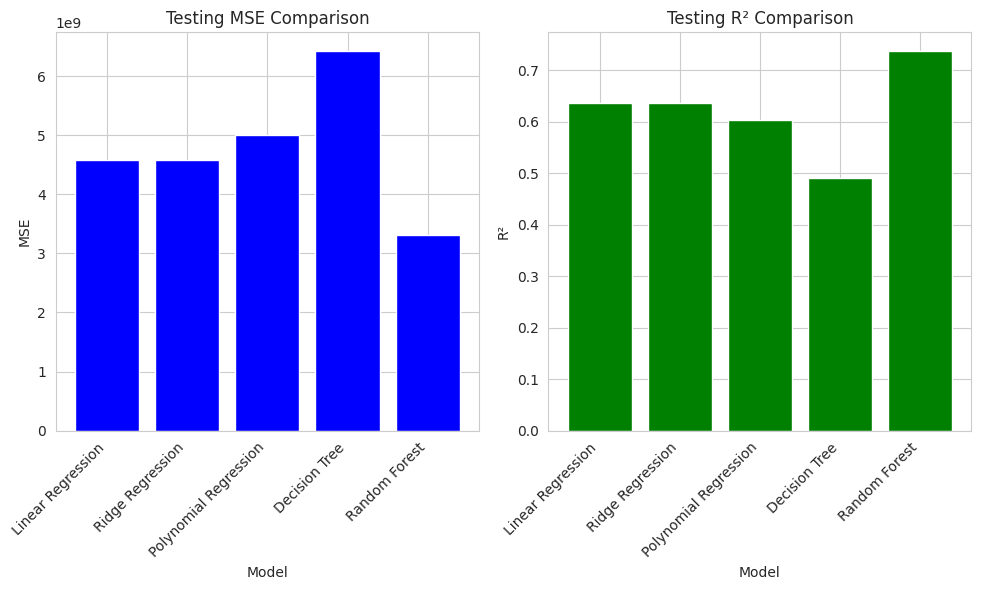

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have predictions for Linear Regression, Ridge Regression, Polynomial Regression, Decision Tree, and Random Forest
# stored in y_test_lr_pred, y_test_ridge_pred, y_test_poly_pred, y_pred_dt, and y_pred_rf respectively

# Calculate performance metrics for each model and store them in a dictionary
performance_metrics = {
    'Linear Regression': {
        'Testing MSE': mean_squared_error(y_test, y_test_lr_pred),
        'Testing R²': r2_score(y_test, y_test_lr_pred)
    },
    'Ridge Regression': {
        'Testing MSE': mean_squared_error(y_test, y_test_ridge_pred),
        'Testing R²': r2_score(y_test, y_test_ridge_pred)
    },
    'Polynomial Regression': {
        'Testing MSE': mean_squared_error(y_test, y_test_poly_pred),
        'Testing R²': r2_score(y_test, y_test_poly_pred)
    },
    'Decision Tree': {
        'Testing MSE': mean_squared_error(y_test, y_pred_dt),
        'Testing R²': r2_score(y_test, y_pred_dt)
    },
    'Random Forest': {
        'Testing MSE': mean_squared_error(y_test, y_pred_rf),
        'Testing R²': r2_score(y_test, y_pred_rf)
    }
}

# Create bar plots for Testing MSE and Testing R²
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(performance_metrics.keys(), [v['Testing MSE'] for v in performance_metrics.values()], color='blue')
plt.title('Testing MSE Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.subplot(1, 2, 2)
plt.bar(performance_metrics.keys(), [v['Testing R²'] for v in performance_metrics.values()], color='green')
plt.title('Testing R² Comparison')
plt.xlabel('Model')
plt.ylabel('R²')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()